In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'year': [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    'frequency': [240,230,220,210,215,200,190,185,180,175,178,172,168,165]
}

india_eq = pd.DataFrame(data)


Historical mean frequency from (2010-2023): 194.86
Predicted frequency for 2026: 141.03
Regression: 0.946
hypothesis: SUPPORTED: predicted 2026 frequency is LESS than historical average.


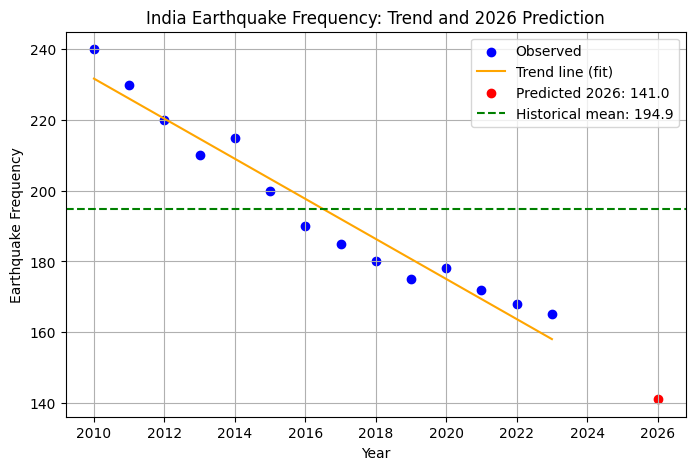

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

data = {
    'year': [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    'frequency': [240,230,220,210,215,200,190,185,180,175,178,172,168,165]  # example
}
india_eq = pd.DataFrame(data)

X = india_eq['year'].values.reshape(-1,1)
y = india_eq['frequency'].values

model = LinearRegression()
model.fit(X, y)

y_pred_train = model.predict(X)
r2 = r2_score(y, y_pred_train)

year_to_predict = 2026
pred_2026 = model.predict(np.array([[year_to_predict]]))[0]

historical_mean = y.mean()

if pred_2026 < historical_mean:
    verdict = "SUPPORTED: predicted 2026 frequency is LESS than historical average."
else:
    verdict = "WRONG: predicted 2026 frequency is NOT less than historical average."

print("Historical mean frequency from (2010-2023):", round(historical_mean,2))
print(f"Predicted frequency for {year_to_predict}:", round(pred_2026,2))
print("Regression:", round(r2,3))
print("hypothesis:", verdict)

plt.figure(figsize=(8,5))
plt.scatter(india_eq['year'], india_eq['frequency'], label='Observed', color='blue')
plt.plot(india_eq['year'], y_pred_train, label='Trend line (fit)', color='orange')
plt.scatter([year_to_predict], [pred_2026], color='red', label=f'Predicted {year_to_predict}: {pred_2026:.1f}')
plt.axhline(historical_mean, color='green', linestyle='--', label=f'Historical mean: {historical_mean:.1f}')
plt.xlabel('Year')
plt.ylabel('Earthquake Frequency')
plt.title('India Earthquake Frequency: Trend and 2026 Prediction')
plt.legend()
plt.grid(True)
plt.show()
